Fernando González Colín

April 10th, 2019

Ciudad de México, México

gc.fernando.96@gmail.com

Examples taken from https://www.tensorflow.org/guide/low_level_intro

In [36]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Tensors

In [2]:
a=tf.constant(5.0, dtype=tf.float32)
b=tf.constant(2.5, dtype=tf.float32)
add=a+b
print('a: {0}\nb: {1}\na+b: {2}'.format(a,b,add))

a: Tensor("Const:0", shape=(), dtype=float32)
b: Tensor("Const_1:0", shape=(), dtype=float32)
a+b: Tensor("add:0", shape=(), dtype=float32)


# Sessions

In [5]:
sess=tf.Session()
print(sess.run(add))
print(sess.run({'ab':(a,b), 'add':add}))

7.5
{'ab': (5.0, 2.5), 'add': 7.5}


# Generate random tensors nxm

In [16]:
vec=tf.random_uniform(shape=(5,2))
out1=vec+1
out2=vec+2
print(sess.run(vec))
print(sess.run(out1))
print(sess.run(out2))

[[0.06201756 0.91145694]
 [0.24147499 0.46653736]
 [0.9177904  0.52944446]
 [0.33175755 0.69845283]
 [0.8951558  0.0214498 ]]
[[1.9854475 1.3399335]
 [1.8164548 1.4820795]
 [1.5573072 1.1230783]
 [1.5477445 1.6935511]
 [1.9459903 1.7750683]]
[[2.6128893 2.8759613]
 [2.5331678 2.9967089]
 [2.0388627 2.976798 ]
 [2.652752  2.682569 ]
 [2.8735292 2.162012 ]]


# Feed tensors

In [10]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
z=x+y
print(sess.run(z,feed_dict={x:3,y:4.5}))
print(sess.run(z,feed_dict={x:[1,3],y:[2,4]}))

7.5
[3. 7.]


# Datasets

In [12]:
my_data=[[0,1],[2,3],[4,5],[6,7]]
slices=tf.data.Dataset.from_tensor_slices(my_data)
next_item=slices.make_one_shot_iterator().get_next()

while True:
    try: print(sess.run(next_item))
    except: break

[0 1]
[2 3]
[4 5]
[6 7]


# Layers

In [15]:
x=tf.placeholder(tf.float32, shape=[None, 3])
linear_model=tf.layers.Dense(units=1)
y=linear_model(x)

init=tf.global_variables_initializer()
sess.run(init)
print(sess.run(y,{x:[[1,2,3],[4,5,6]]}))

[[-1.7866668]
 [-2.4919305]]


# Layers function shortcuts

In [17]:
x=tf.placeholder(tf.float32, shape=[None, 3])
y=tf.layers.dense(x,units=1)

init=tf.global_variables_initializer()
sess.run(init)
print(sess.run(y,{x:[[1,2,3],[4,5,6]]}))

[[1.4890054]
 [2.8500478]]


# Feature columns

In [19]:
features={
    'sales':[[5],[10],[8],[9]],
    'department': ['sports','sports','gardening','gardening']
}

department_column=tf.feature_column.categorical_column_with_vocabulary_list(
    'department',
    ['sports','gardening']
)
department_column=tf.feature_column.indicator_column(department_column)

columns=[
    tf.feature_column.numeric_column('sales'),
    department_column
]

inputs=tf.feature_column.input_layer(features,columns)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [25]:
var_init=tf.global_variables_initializer()
table_init=tf.tables_initializer()
sess=tf.Session()
sess.run((var_init,table_init))
print(sess.run(inputs))

[[ 1.  0.  5.]
 [ 1.  0. 10.]
 [ 0.  1.  8.]
 [ 0.  1.  9.]]


# Training

[[0.9243518]
 [1.8487036]
 [2.7730556]
 [3.6974072]]
19.151714


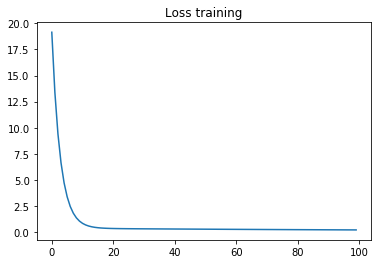

In [35]:
# Define data
x=tf.constant([[1],[2],[3],[4]],dtype=tf.float32)
y_true=tf.constant([[0],[-1],[-2],[-3]],dtype=tf.float32)

# Define model
linear_model=tf.layers.Dense(units=1)
y_pred=linear_model(x)

# Prediction without training
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
print(sess.run(y_pred))

# Loss function
loss=tf.losses.mean_squared_error(labels=y_true,predictions=y_pred)
print(sess.run(loss))

# Training
optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(loss)

training=np.array([])
for i in range(100):
    _, loss_value=sess.run((train,loss))
    training=np.append(training,loss_value)
    
plt.plot(training)
plt.title('Loss training')
plt.show()